kd_smoother'\s INJ in 15T, long direction.


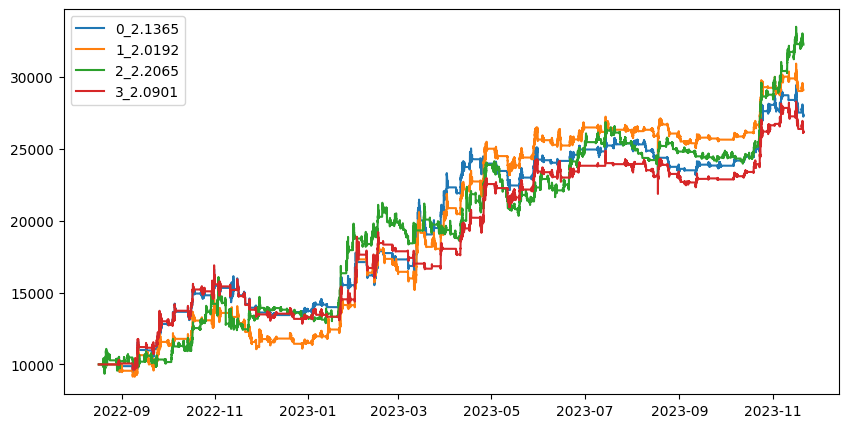

kd_smoother'\s APT in 15T, long direction.


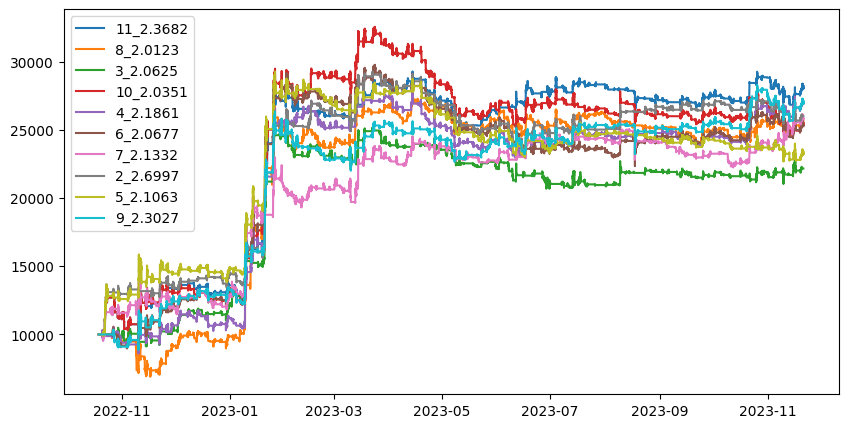

kd_smoother'\s APT in 15T, short direction.


KeyboardInterrupt: 

In [7]:
import os 
import sys
import importlib
import warnings
import pandas as pd
import random
import json
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")

from src.strategy.MultiTester import MultiTester

strategy_path = os.path.join(sys.path[0], 'Crypto')
strategy_folders = [folder for folder in os.listdir(strategy_path) if os.path.isdir(os.path.join(strategy_path, folder))]
start = '2022-01-01'

def plot_multi_params(strategy_name,params_dict, freq):
    for coin in params_dict['params'].keys():
        for direction in params_dict['params'][coin].keys():
            if len(params_dict['params'][coin][direction].values()) == 0:
                break
            print(f'{strategy_name} {coin} in {freq}, {direction} direction.')
            plt.figure(figsize=(10,5))
            keys = list(params_dict['params'][coin][direction].keys())
            if len(keys) >= 10:
                random_keys = random.sample(keys, 10)
                keys = random_keys 
            for idx in keys:
                value = params_dict['params'][coin][direction][idx]
                param = value
                config = {'freq':freq, 'lag':1, 'fee': 0.0003, 'weekend_filter': False, 'rv_filter':False}
                df = pd.read_hdf(f'/Users/johnsonhsiao/Desktop/data/{coin}USDT_PERPETUAL.h5')
                strategy = Strategy(df=df.loc[start:], configs=config)
                pf = strategy.strategy(side=direction,params=param)
                stat = pf.stats()
                values = pf.value
                sharpe = round(stat['Sharpe Ratio'],4)
                plt.plot(values.index, values, label=f'{idx}_{sharpe}')
            plt.legend()
            plt.show()
            
for strategy_name in strategy_folders:
    module_name = f'Crypto.{strategy_name}.{strategy_name}'
    strategy_module = importlib.import_module(module_name)
    Strategy = getattr(strategy_module, 'Strategy')
    param_list = os.listdir(f'./Crypto/{strategy_name}/opt/')
    for folder in param_list:
        if '.json' in folder:
            freq = folder.split('_')[0]
            with open(f'./Crypto/{strategy_name}/opt/{folder}', 'r') as file:
                params_dict = json.load(file)
                plot_multi_params(strategy_name,params_dict, freq)